# Heart Disease Prediction using Machine Learning
This notebook implements various ML algorithms on the Cleveland Heart Disease dataset.

## 1. Data Loading

In [87]:
# Download dataset (https://drive.google.com/file/d/1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN/view)
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: e:\AIO2024\AIO2024_Projects\Module_3\Heart_Disease_Prediction\cleveland.csv

  0%|          | 0.00/10.9k [00:00<?, ?B/s]
100%|██████████| 10.9k/10.9k [00:00<?, ?B/s]


In [88]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [89]:
# Convert target variable to binary
df['target'] = df['target'].map(lambda x: 0 if x == 0 else 1)

# Fill missing values by mean value
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mean())

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


## 2. Exploratory Data Analysis

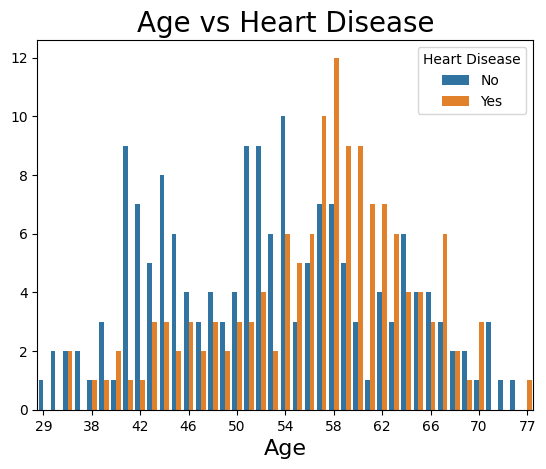

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age vs Heart Disease
sns.countplot(data=df, x='age', hue='target', hue_order=[0, 1])
plt.title('Age vs Heart Disease', fontsize=20)
plt.xticks(np.arange(0, 44, 4))
plt.xlabel('Age', fontsize=16)
plt.ylabel('')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

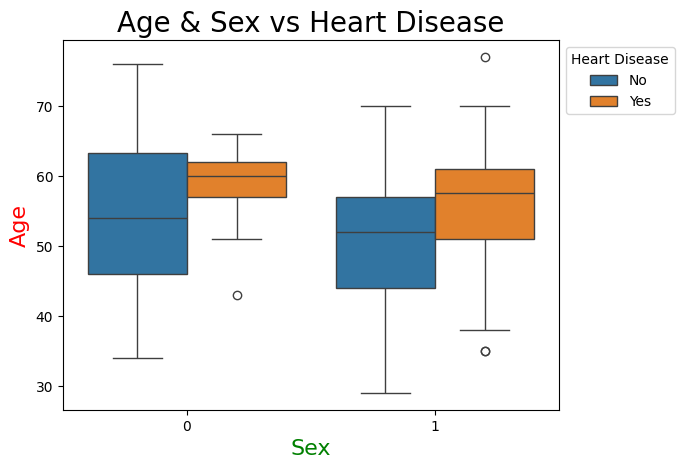

In [91]:
# Age & Sex vs Heart Disease
ax = sns.boxplot(data=df, x='sex', y='age', hue='target', hue_order=[0, 1])
plt.title('Age & Sex vs Heart Disease', fontsize=20)
plt.xlabel('Sex', fontsize=16, color='green')
plt.ylabel('Age', fontsize=16, color='red')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Yes'], title='Heart Disease', bbox_to_anchor=(1, 1))
plt.show()

## 3. Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract and scale features
X = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extract target variable
y = df['target']

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # If you want to use unscaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4. Model Training & Evaluation

### 4.1. Individual Model

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

# Define models with hyperparameters
model_dict = {
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2),
    "Random Forest": RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=10, min_samples_split=2, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "GradientBoost": GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0,
                                                 min_samples_split=2, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42),
}

In [94]:
# Initialize results dictionary
results = {}

# Train and evaluate each model
for name, model in model_dict.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    # Store and print results for each model
    results[name] = {"Train Accuracy": acc_train, "Test Accuracy": acc_test}
    print(f"{name} - Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}")

KNN - Train Accuracy: 0.7562, Test Accuracy: 0.6885
SVM - Train Accuracy: 0.6612, Test Accuracy: 0.6721
Naive Bayes - Train Accuracy: 0.8471, Test Accuracy: 0.8361
Decision Tree - Train Accuracy: 1.0000, Test Accuracy: 0.7541
Random Forest - Train Accuracy: 0.9835, Test Accuracy: 0.8033
AdaBoost - Train Accuracy: 0.8843, Test Accuracy: 0.9016
GradientBoost - Train Accuracy: 0.9959, Test Accuracy: 0.8525
XGBoost - Train Accuracy: 1.0000, Test Accuracy: 0.8689


### 4.2 For Stacking Ensemble Model

In [95]:
from sklearn.linear_model import LogisticRegression

# Define the stacking classifier with multiple base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Create the stacking classifier with logistic regression as the final estimator
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), passthrough=True)

In [96]:
# Fit the stacking classifier
stack.fit(X_train, y_train)

# Predict 
y_train_pred = stack.predict(X_train)
y_test_pred = stack.predict(X_test)

# Calculate accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# Store and print results for stacking classifier
results['Stacking'] = {"Train Accuracy": acc_train, "Test Accuracy": acc_test}
print(f"Stacking - Train Accuracy: {acc_train:.2f}, Test Accuracy: {acc_test:.2f}")

Stacking - Train Accuracy: 0.84, Test Accuracy: 0.92


c:\Users\admin\anaconda3\envs\Phatban\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Visualization

In [97]:
# Create a summary DataFrame of results
summary_df = pd.DataFrame(results).T
summary_df.sort_values(by='Test Accuracy', ascending=False)

,Train Accuracy,Test Accuracy
Stacking,0.842975,0.918033
AdaBoost,0.884298,0.901639
XGBoost,1.000000,0.868852
GradientBoost,0.995868,0.852459
Naive Bayes,0.847107,0.836066
Random Forest,0.983471,0.803279
Decision Tree,1.000000,0.754098
KNN,0.756198,0.688525
SVM,0.661157,0.672131


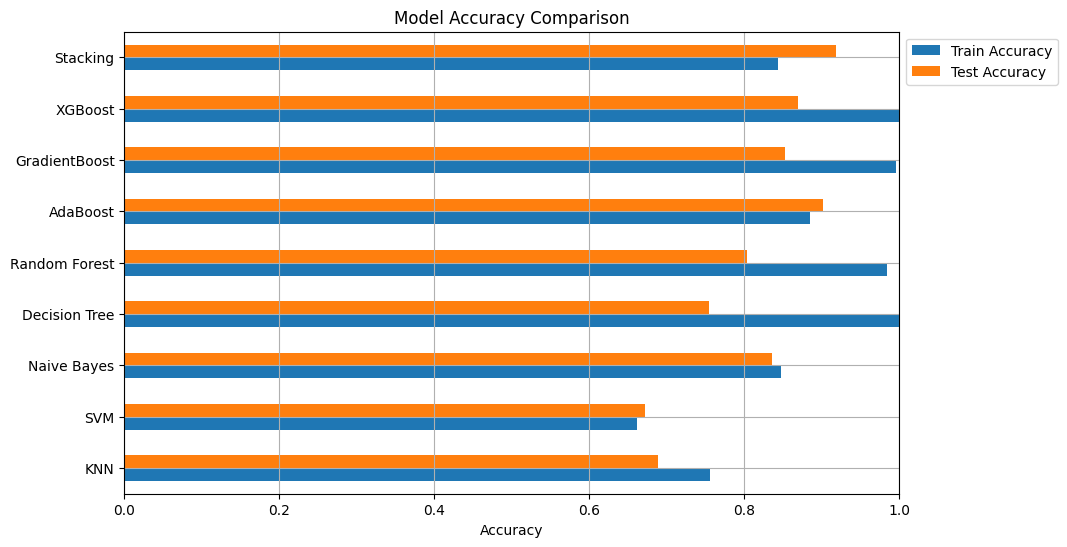

In [98]:
# Visualization of model performance
summary_df.plot(kind='barh', figsize=(10, 6))
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.grid(True)
plt.xlim(0, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()